**Importing Libraries**

In [1]:
# Pandas for dataframe and data manipulation
import pandas as pd
import numpy as np

# Matplotlib for plotting/visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For data preprocessing
from sklearn import preprocessing
label = preprocessing.LabelEncoder()    # for encoding text data

# For statistical analysis
from scipy import stats
from scipy.stats import ttest_ind

# For data scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# For clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA    # dimensionality reduction
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
# load the dataset
df_1 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset/Fiverr/knn_5_imputed_dataset.xlsx")

In [3]:
pathway_pro_82 = [
    "Samples","Gender", "Age_Group", "ABCC6", "ACBD5", "AFG3L2", "AIPL1", "ALMS1", "APOD", "APOE", "ARL2BP", "ARL6", "ARMS2",
    "ARSG", "BBS10", "BBS2", "BEST1", "C2", "C3", "C8orf37", "CABP4", "CACNA1F", "CAPN5",
    "CC2D2A", "CFB", "CFD", "CFHR1", "CHM", "CLCC1", "CLN3", "CLRN1", "CLUAP1", "CNGB3",
    "CNNM4", "COX2", "CYSLT1R", "ESPN", "GRK1", "GUCY2D", "HGSNAT", "HMCN1", "IFT27", "IMPG1",
    "ITM2B", "KLHL7", "LCA5", "LRAT", "LRP5", "LTB4R", "LTE4", "LZTFL1", "MYO7A", "NDP",
    "NEK2", "NPHP1", "NR2E3", "NRL", "PCARE", "PCDH15", "PDE6B", "PDE6C", "PDZD7", "PEX7",
    "POC1B", "PRDM13", "PROM1", "PRPF4", "RB1", "RDH5", "REEP6", "RGR", "RGS9BP", "RLBP1",
    "RP1L1", "RPGR", "SAG", "SDCCAG8", "TIMP3", "TSPAN12", "TTC8", "TUBGCP4", "TUBGCP6",
    "USH2A", "VEGFA", "WDPCP"]


In [4]:
# pathways

Inflammation = ["COX2", "CFB", "CFD", "CFHR1", "TIMP3", "VEGFA", "LTB4R", "LTE4"]

Oxidative_Stress = ["APOD", "APOE", "ARSG", "HMCN1"]

Immunity = ["C2", "C3"]

Apoptosis = ["CAPN5", "TIMP3", "RB1"]

Aging = ["APOE", "ARMS2", "PRPF4", "GRK1"]

Visual_Perception = ["CNGB3", "GRK1", "GUCY2D", "PDE6B", "PDE6C", "RGS9BP", "SAG", "RGR", "RP1L1", "RPGR", "NRL", "AIPL1", "CABP4", "BEST1", "CLRN1", "RLBP1"]

Ciliopathy = ["ARL6", "BBS10", "BBS2", "CC2D2A", "CLUAP1", "IFT27", "NPHP1", "POC1B", "RPGR", "TTC8", "USH2A", "ALMS1", "ARL2BP", "CLN3", "PCARE", "PDZD7", "WDPCP", "C8orf37"]

Lipid_Metabolism = ["ABCC6", "ACBD5", "APOD", "APOE", "LRP5", "PEX7"]

Cellular_Transport = ["ACBD5", "AFG3L2", "CHM", "CLCC1", "CNNM4", "CYSLT1R", "ESPN", "HGSNAT", "LCA5", "LRAT", "LZTFL1", "MYO7A", "PDE6B", "PDE6C", "SDCCAG8", "TUBGCP4", "TUBGCP6", "ITM2B", "KLHL7", "REEP6"]

Signal_Transduction = ["NEK2", "PRDM13", "TSPAN12"]


In [5]:
# Create a new dataset with pathway specific proteins
df_pathway = df_1[pathway_pro_82]

df_signal_transduction = df_pathway[Signal_Transduction]

# Concatenate the additional columns
df_signal_transduction = pd.concat([df_pathway[["Samples", "Gender", "Age_Group"]], df_signal_transduction], axis=1)

In [6]:
df_signal_transduction.head() # display dataset's 1st 5 rows

,Samples,Gender,Age_Group,NEK2,PRDM13,TSPAN12
0,1_50:60_F,Female,50-60,189.2,288.6,163.2
1,2_50:60_F,Female,50-60,199.0,289.0,145.0
2,3_40:50_F,Female,40-50,182.0,288.6,174.0
3,4_40:50_F,Female,40-50,179.0,301.0,153.4
4,5_50:60_F,Female,50-60,199.0,300.0,172.0


In [7]:
print(df_signal_transduction.shape)   # dataset rows & columns
df_signal_transduction.columns        # columns of the dataset

(500, 6)


Index(['Samples', 'Gender', 'Age_Group', 'NEK2', 'PRDM13', 'TSPAN12'], dtype='object')

In [8]:
df_signal_transduction.info()     # details of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Samples    500 non-null    object 
 1   Gender     500 non-null    object 
 2   Age_Group  500 non-null    object 
 3   NEK2       500 non-null    float64
 4   PRDM13     500 non-null    float64
 5   TSPAN12    500 non-null    float64
dtypes: float64(3), object(3)
memory usage: 23.6+ KB


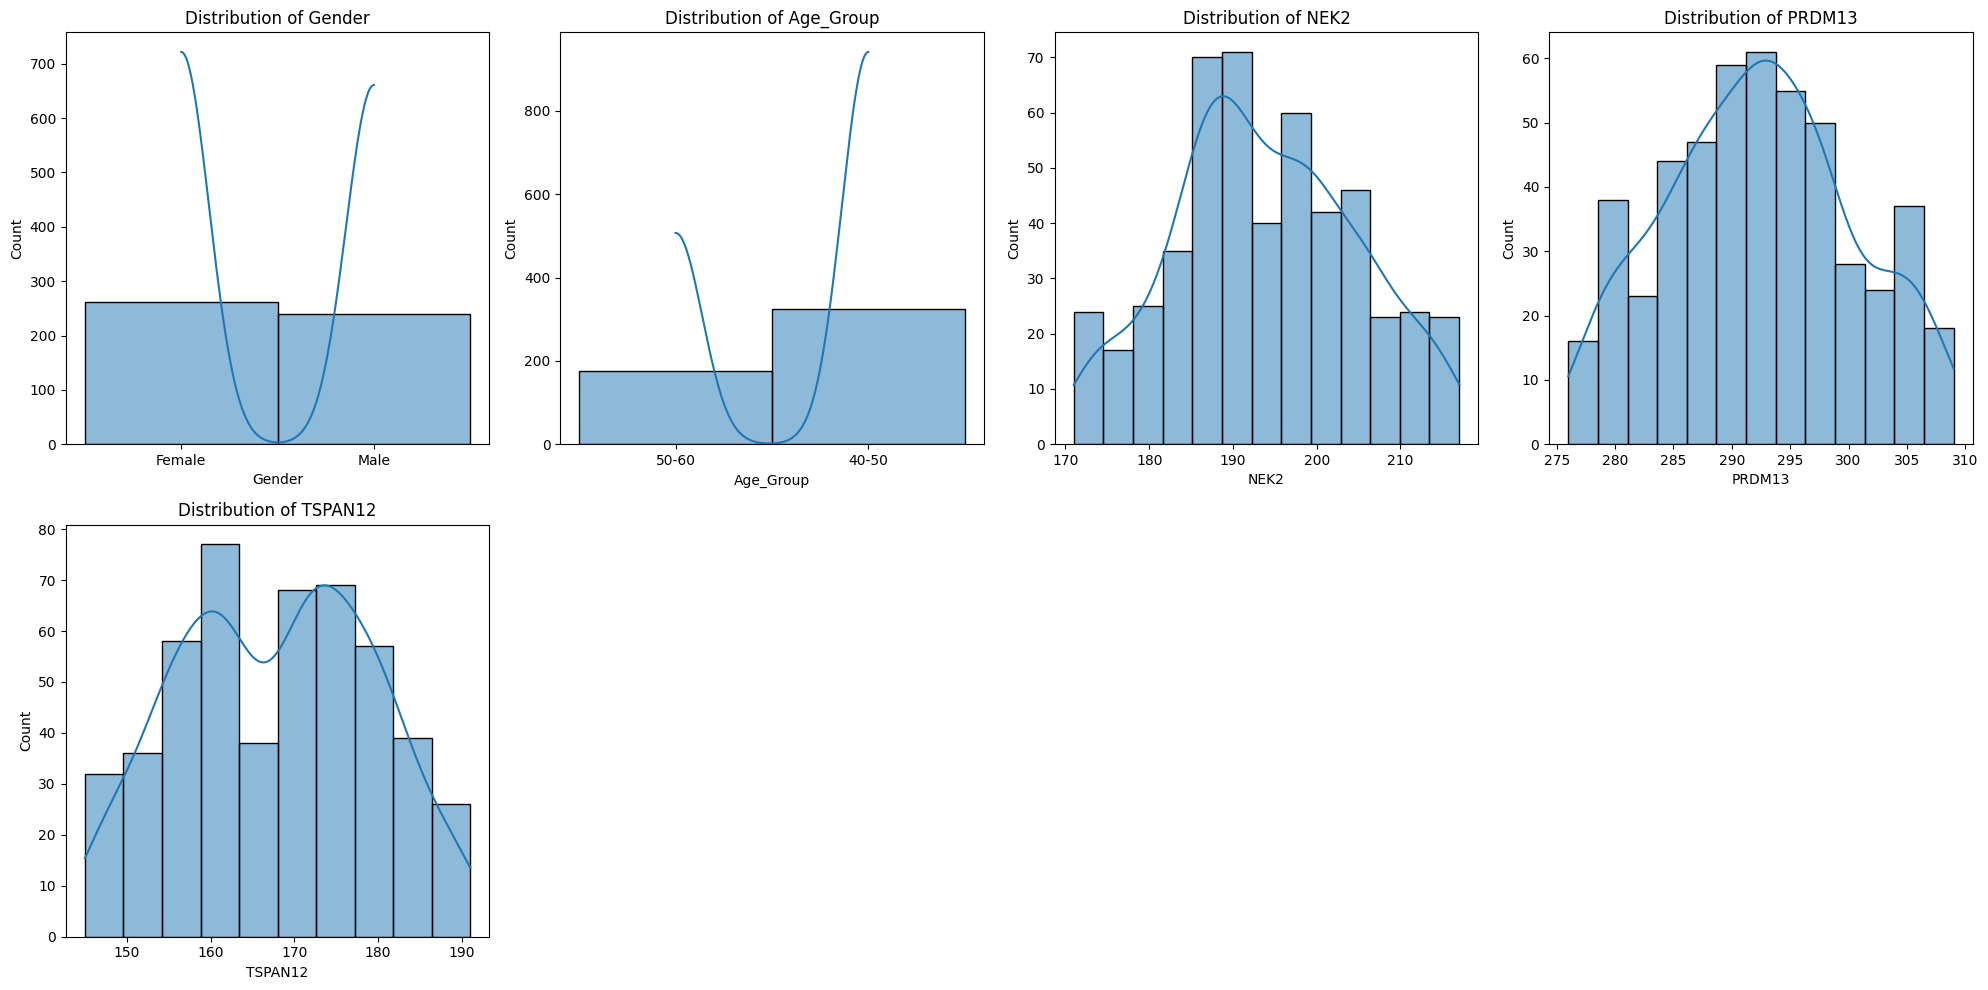

In [9]:
# Data distribution of all columns among the samples
# Number of columns to be plotted
num_columns = len(df_signal_transduction.columns) - 1  # Subtracting 1 to exclude the first column

# Calculate the number of rows and columns needed
num_cols = 4
num_rows = (num_columns // num_cols) + (num_columns % num_cols != 0)

# Visualize the distribution of each peptide
plt.figure(figsize=(20, num_rows * 5))  # Adjust height based on the number of rows
for i, column in enumerate(df_signal_transduction.columns[1:], 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df_signal_transduction[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

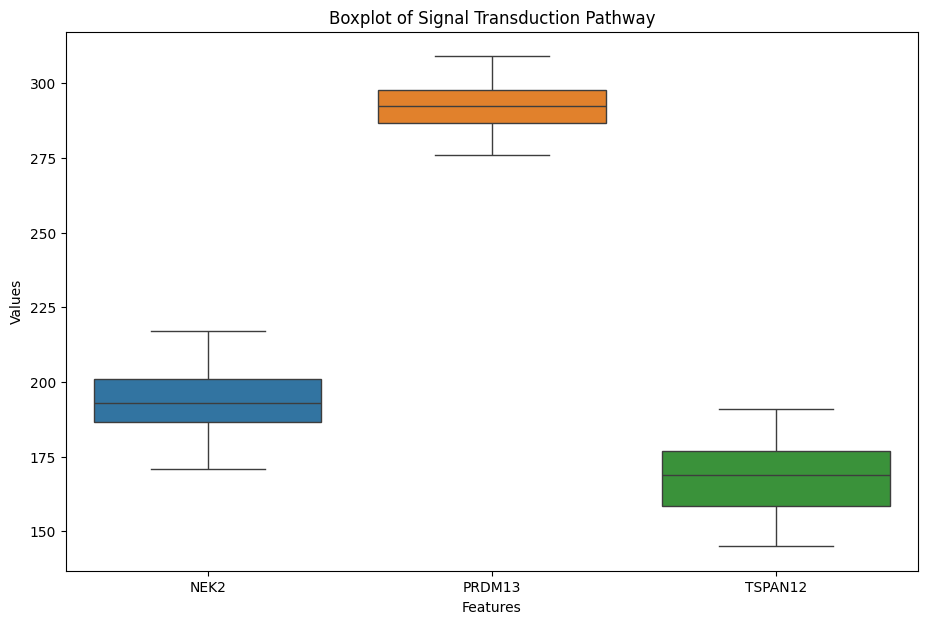

In [10]:
# Boxplot
plt.figure(figsize=(11, 7))
sns.boxplot(data=df_signal_transduction)

plt.title("Boxplot of Signal Transduction Pathway")
plt.ylabel("Values")
plt.xlabel("Features")
plt.show()


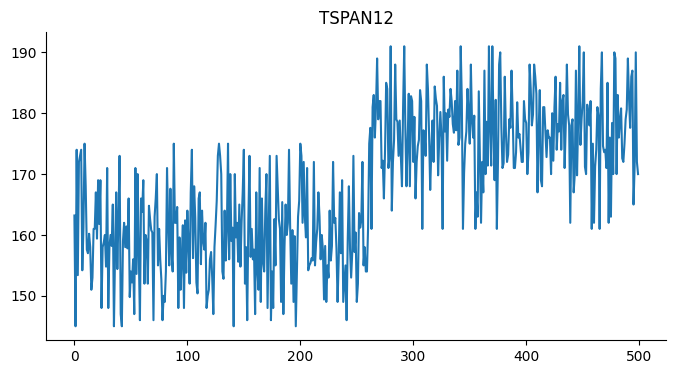

In [11]:
# TSPAN12 in samples

df_signal_transduction['TSPAN12'].plot(kind='line', figsize=(8, 4), title='TSPAN12')
plt.gca().spines[['top', 'right']].set_visible(False)

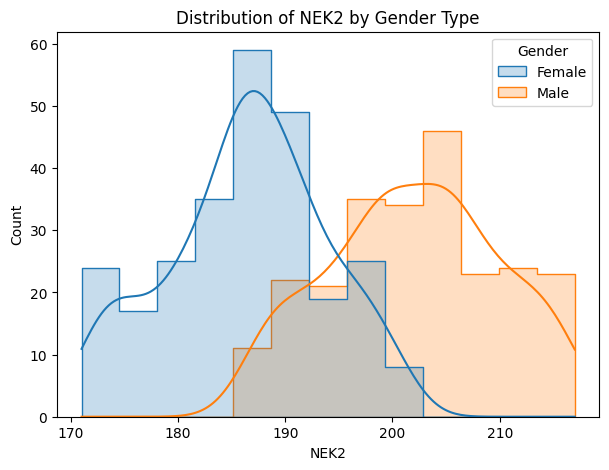

In [12]:
# Distribution plot for 'NEK2'
plt.figure(figsize=(7, 5))
sns.histplot(data=df_signal_transduction, x='NEK2', hue='Gender', kde=True, element="step")
plt.title('Distribution of NEK2 by Gender Type')
plt.show()

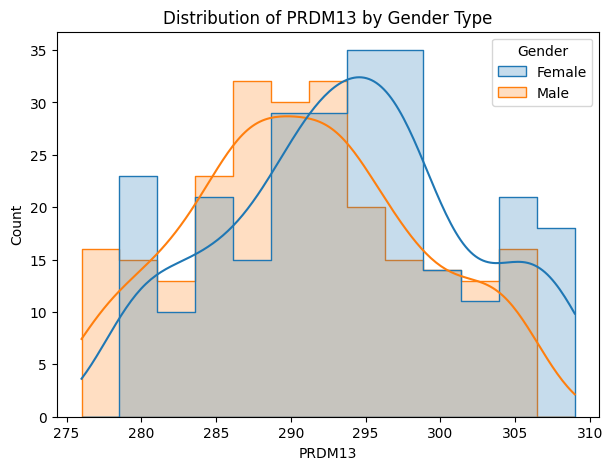

In [13]:
# Distribution plot for 'PRDM13'
plt.figure(figsize=(7, 5))
sns.histplot(data=df_signal_transduction, x='PRDM13', hue='Gender', kde=True, element="step")
plt.title('Distribution of PRDM13 by Gender Type')
plt.show()

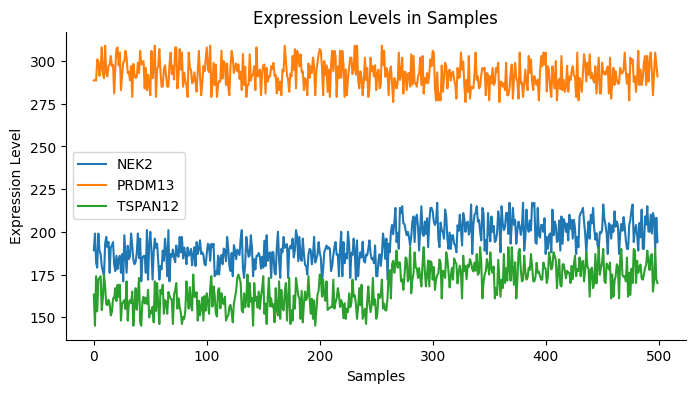

In [14]:
# Plotting proteins
df_signal_transduction[["NEK2", "PRDM13", "TSPAN12"]].plot(kind='line', figsize=(8, 4), title='Expression Levels in Samples')

# Removing top and right spines for cleaner appearance
plt.gca().spines[['top', 'right']].set_visible(False)

# Adding labels to x and y axes
plt.xlabel('Samples')
plt.ylabel('Expression Level')

# Displaying the plot
plt.show()


Here, we calculated the frequency of each protein across samples, along with their average concentration (mean) and standard deviation. Additionally, we determined the standard deviation as a percentage of the mean expression, known as the coefficient of variation (CV). This provides a relative measure of the variability in expression levels.

In [15]:
# dictionary to store results for each protein
protein_stats = {}

for protein in df_signal_transduction.columns[3:]:
    expression_data = df_signal_transduction[protein]

    # Frequency (percentage of patients expressing the protein)
    frequency = round((expression_data > 0).sum() / len(expression_data) * 100, 3)

    # Spectral Counting Mean (average concentration)
    mean_expression = round(expression_data.mean(), 3)

    # Standard Deviation and Percentage (mean expression)
    std_dev = round(expression_data.std(), 3)
    std_dev_percentage_cv = round((std_dev / mean_expression) * 100, 3) if mean_expression != 0 else np.nan

    # store the results
    protein_stats[protein] = {
        'Frequency (%)': frequency,
        'Mean Expression': mean_expression,
        'Standard Deviation': std_dev,
        'CV (%)': std_dev_percentage_cv
    }

# convert to DataFrame
protein_stats_df = pd.DataFrame(protein_stats).T

In [16]:
protein_stats_df     # columns statistical analysis

,Frequency (%),Mean Expression,Standard Deviation,CV (%)
NEK2,100.0,193.872,10.889,5.617
PRDM13,100.0,292.370,8.012,2.740
TSPAN12,100.0,167.844,11.499,6.851


In [17]:
df_corr = df_signal_transduction.iloc[:, 3:]    # correlation among columns
df_corr.corr()

,NEK2,PRDM13,TSPAN12
NEK2,1.000000,-0.088316,0.534464
PRDM13,-0.088316,1.000000,-0.134517
TSPAN12,0.534464,-0.134517,1.000000


NEK2 and TSPAN12 show a moderate positive correlation, suggesting they may function together or regulate each other in the signal transduction pathway.

PRDM13 has weak negative correlations with both NEK2 and TSPAN12, indicating that its role may be relatively independent or even slightly antagonistic to these genes in the pathway.

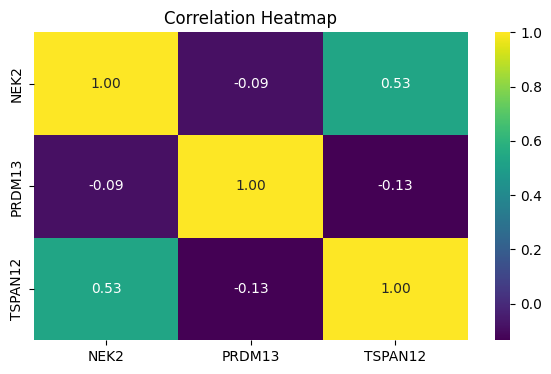

In [18]:
# Correlation Heatmap
plt.figure(figsize=(7, 4))
correlation_matrix = df_corr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Performed statistical tests to identify proteins that show significant differences in expression levels between different genders (male and female) and between different age groups (40-50 and 50-60).

In [19]:
# Segregate data by gender and age group
males = df_signal_transduction[df_signal_transduction['Gender'] == 'Male']
females = df_signal_transduction[df_signal_transduction['Gender'] == 'Female']

age_40_50 = df_signal_transduction[df_signal_transduction['Age_Group'] == '40-50']
age_50_60 = df_signal_transduction[df_signal_transduction['Age_Group'] == '50-60']

# List to store significant proteins
significant_proteins_gender = []
significant_proteins_age = []

for protein in df_signal_transduction.columns[3:]:
    # Gender differences (t-test)
    t_stat, p_val_gender = ttest_ind(males[protein], females[protein], nan_policy='omit')
    if p_val_gender < 0.05:
        significant_proteins_gender.append(protein)

    # Age group differences (t-test)
    t_stat, p_val_age = ttest_ind(age_40_50[protein], age_50_60[protein], nan_policy='omit')
    if p_val_age < 0.05:
        significant_proteins_age.append(protein)

print("Proteins with significant differences between genders:", significant_proteins_gender)
print("Proteins with significant differences between age groups:", significant_proteins_age)


Proteins with significant differences between genders: ['NEK2', 'PRDM13', 'TSPAN12']
Proteins with significant differences between age groups: []


In [20]:
print('Number of significant proteins:', len(significant_proteins_gender))
print('Number of significant proteins:', len(significant_proteins_age))

Number of significant proteins: 3
Number of significant proteins: 0


In [21]:
# Convert Gender and Age_Group columns to categorical type
df_1['Gender'] = df_1['Gender'].astype('category')
df_1['Age_Group'] = df_1['Age_Group'].astype('category')

# pathway dictionary
pathways = {
    "Inflammation": ["COX2", "CFB", "CFD", "CFHR1", "TIMP3", "VEGFA", "LTB4R", "LTE4"],
    "Oxidative_Stress": ["APOD", "APOE", "ARSG", "HMCN1"],
    "Immunity": ["C2", "C3"],
    "Apoptosis": ["CAPN5", "TIMP3", "RB1"],
    "Aging": ["APOE", "ARMS2", "PRPF4", "GRK1"],
    "Visual_Perception": ["CNGB3", "GRK1", "GUCY2D", "PDE6B", "PDE6C", "RGS9BP", "SAG", "RGR", "RP1L1", "RPGR", "NRL", "AIPL1", "CABP4", "BEST1", "CLRN1", "RLBP1"],
    "Ciliopathy": ["ARL6", "BBS10", "BBS2", "CC2D2A", "CLUAP1", "IFT27", "NPHP1", "POC1B", "RPGR", "TTC8", "USH2A", "ALMS1", "ARL2BP", "CLN3", "PCARE", "PDZD7", "WDPCP", "C8orf37"],
    "Lipid_Metabolism": ["ABCC6", "ACBD5", "APOD", "APOE", "LRP5", "PEX7"],
    "Cellular_Transport": ["ACBD5", "AFG3L2", "CHM", "CLCC1", "CNNM4", "CYSLT1R", "ESPN", "HGSNAT", "LCA5", "LRAT", "LZTFL1", "MYO7A", "PDE6B", "PDE6C", "SDCCAG8", "TUBGCP4", "TUBGCP6", "ITM2B", "KLHL7", "REEP6"],
    "Signal_Transduction": ["NEK2", "PRDM13", "TSPAN12"]
}

# Select the pathway to analyze
selected_pathway = "Signal_Transduction"  # Change this to analyze a different pathway

# Subset the DataFrame for the selected pathway
proteins = pathways[selected_pathway]
df_pathway_stat = df_1[proteins + ['Gender', 'Age_Group']]

# Summary statistics for the selected pathway
summary_stats = df_pathway_stat.groupby(['Gender', 'Age_Group'])[proteins].agg(['mean', 'median', 'std'])
print(f"Summary Statistics for {selected_pathway} Pathway:")
print(summary_stats)


Summary Statistics for Signal_Transduction Pathway:
                        NEK2                       PRDM13                   \
                        mean median       std        mean median       std   
Gender Age_Group                                                             
Female 40-50      186.577273  187.0  7.300939  293.800000  293.8  7.912839   
       50-60      186.049412  186.4  7.390657  293.847059  294.0  8.362823   
Male   40-50      202.459060  202.8  8.089850  290.696644  290.0  7.284178   
       50-60      201.308889  201.4  7.522918  290.946667  291.0  8.349274   

                     TSPAN12                   
                        mean median       std  
Gender Age_Group                               
Female 40-50      159.595455  159.3  7.788195  
       50-60      159.178824  158.6  7.467200  
Male   40-50      176.837584  177.0  7.486939  
       50-60      177.266667  177.3  6.691870  


<ipython-input-21-c6609957783f>:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = df_pathway_stat.groupby(['Gender', 'Age_Group'])[proteins].agg(['mean', 'median', 'std'])


In [22]:
# # Display summary statistics as a DataFrame
# summary_stats_df = pd.DataFrame(summary_stats)
# display(summary_stats_df)

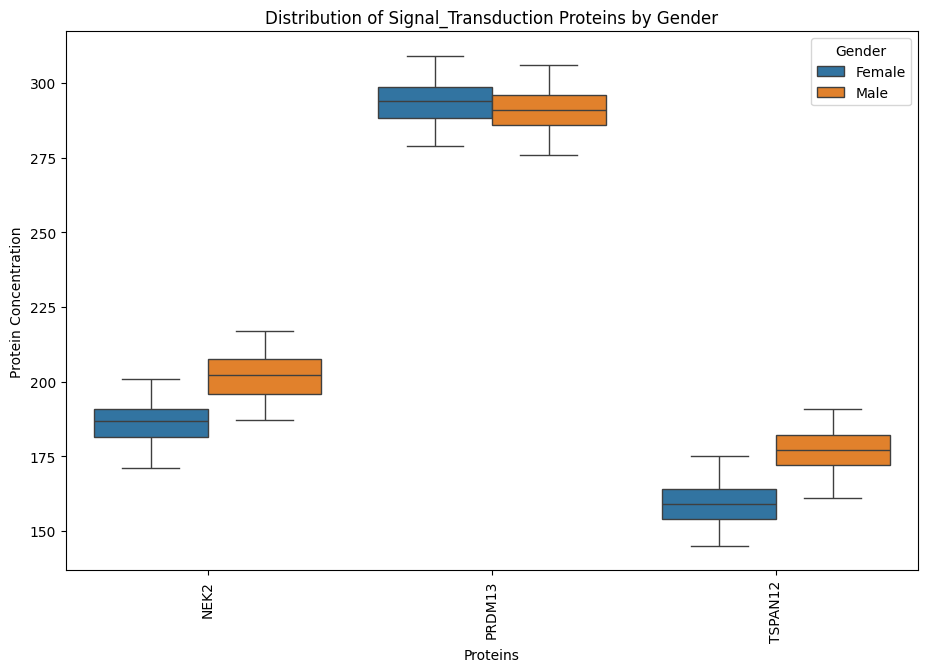

In [23]:
# Visualization: Distribution by Gender
plt.figure(figsize=(11, 7))
sns.boxplot(data=df_pathway.melt(id_vars=['Gender', 'Age_Group'], value_vars=proteins),
            x='variable', y='value', hue='Gender')
plt.title(f"Distribution of {selected_pathway} Proteins by Gender")
plt.xticks(rotation=90)
plt.ylabel("Protein Concentration")
plt.xlabel("Proteins")
plt.show()

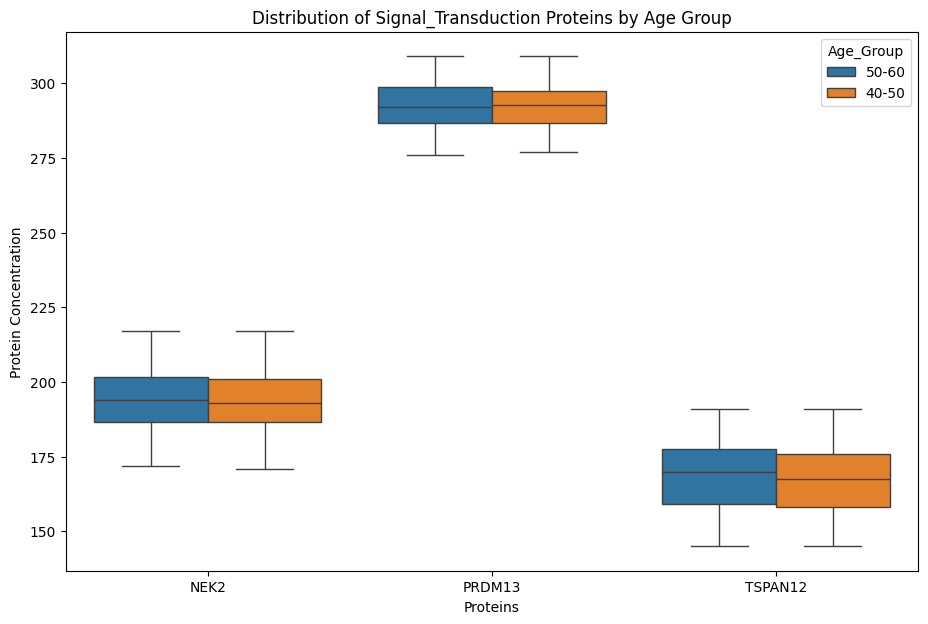

In [24]:
# Visualization: Distribution by Age Group
plt.figure(figsize=(11, 7))
sns.boxplot(data=df_pathway.melt(id_vars=['Gender', 'Age_Group'], value_vars=proteins),
            x='variable', y='value', hue='Age_Group')
plt.title(f"Distribution of {selected_pathway} Proteins by Age Group")
# plt.xticks(rotation=90)
plt.ylabel("Protein Concentration")
plt.xlabel("Proteins")
plt.show()

Here, we normalized the spectral counting data and categorized the proteins based on their expression levels.

In [25]:
p_columns = df_signal_transduction.columns[3:]  # protein columns

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
df_normalized = df_signal_transduction.copy()
df_normalized[p_columns] = scaler.fit_transform(df_signal_transduction[p_columns])

# Categorize proteins
def categorize_expression_level(value):
    if value >= 0.7:
        return 'Highly Expressed'
    elif value <= 0.3:
        return 'Lowly Expressed'
    else:
        return 'Moderately Expressed'

# Apply categorization to each protein column
df_categorized = df_normalized.copy()
for col in p_columns:
    df_categorized[col] = df_normalized[col].apply(categorize_expression_level)

# categorization results
summary = df_categorized[p_columns].apply(pd.Series.value_counts).fillna(0)
summary = summary.transpose()

# Display the summary
print(summary)

         Highly Expressed  Lowly Expressed  Moderately Expressed
NEK2                  111               98                   291
PRDM13                 94              105                   301
TSPAN12               119              126                   255


In [26]:
# convert the result summary in a DataFrame
summary_df = summary.reset_index()
summary_df.columns = ['Protein', 'Highly Expressed', 'Lowly Expressed', 'Moderately Expressed']
summary_df

,Protein,Highly Expressed,Lowly Expressed,Moderately Expressed
0,NEK2,111,98,291
1,PRDM13,94,105,301
2,TSPAN12,119,126,255


In [27]:
# Function to normalize and categorize proteins
def normalize_and_categorize(df, p_columns):
    # Normalize the data using MinMaxScaler
    scaler = MinMaxScaler()
    df_normalized = df.copy()
    df_normalized[p_columns] = scaler.fit_transform(df[p_columns])

    # Apply categorization to each protein column
    df_categorized = df_normalized.copy()
    for col in p_columns:
        df_categorized[col] = df_normalized[col].apply(categorize_expression_level)

    # Summarize the categorization results
    summary = df_categorized[p_columns].apply(pd.Series.value_counts).fillna(0)
    summary = summary.transpose()

    # Reindex the summary to ensure all categories are present
    summary = summary.reindex(columns=["Highly Expressed", "Lowly Expressed", "Moderately Expressed"], fill_value=0)

    # Convert the result summary into a DataFrame
    summary_df = summary.reset_index()
    summary_df.columns = ['Protein', 'Highly Expressed', 'Lowly Expressed', 'Moderately Expressed']
    return summary_df

# Normalize and categorize for Male
summary_male_df = normalize_and_categorize(males, p_columns)

# Normalize and categorize for Female
summary_female_df = normalize_and_categorize(females, p_columns)

# Display the results
print("Summary for Males:")
print(summary_male_df)

print("\nSummary for Females:")
print(summary_female_df)

Summary for Males:
   Protein  Highly Expressed  Lowly Expressed  Moderately Expressed
0     NEK2                59               61                   119
1   PRDM13                56               53                   130
2  TSPAN12                64               31                   144

Summary for Females:
   Protein  Highly Expressed  Lowly Expressed  Moderately Expressed
0     NEK2                61               54                   146
1   PRDM13                52               64                   145
2  TSPAN12                57               68                   136


In [28]:
# Normalize and categorize for Age 40-50
summary_age_40_50_df = normalize_and_categorize(age_40_50, p_columns)

# Normalize and categorize for Age 50-60
summary_age_50_60_df = normalize_and_categorize(age_50_60, p_columns)

# Display the results
print("Summary for Age 40-50:")
print(summary_age_40_50_df)

print("\nSummary for Age 50-60:")
print(summary_age_50_60_df)

Summary for Age 40-50:
   Protein  Highly Expressed  Lowly Expressed  Moderately Expressed
0     NEK2                73               63                   189
1   PRDM13                53               81                   191
2  TSPAN12                74               83                   168

Summary for Age 50-60:
   Protein  Highly Expressed  Lowly Expressed  Moderately Expressed
0     NEK2                38               37                   100
1   PRDM13                39               37                    99
2  TSPAN12                45               43                    87


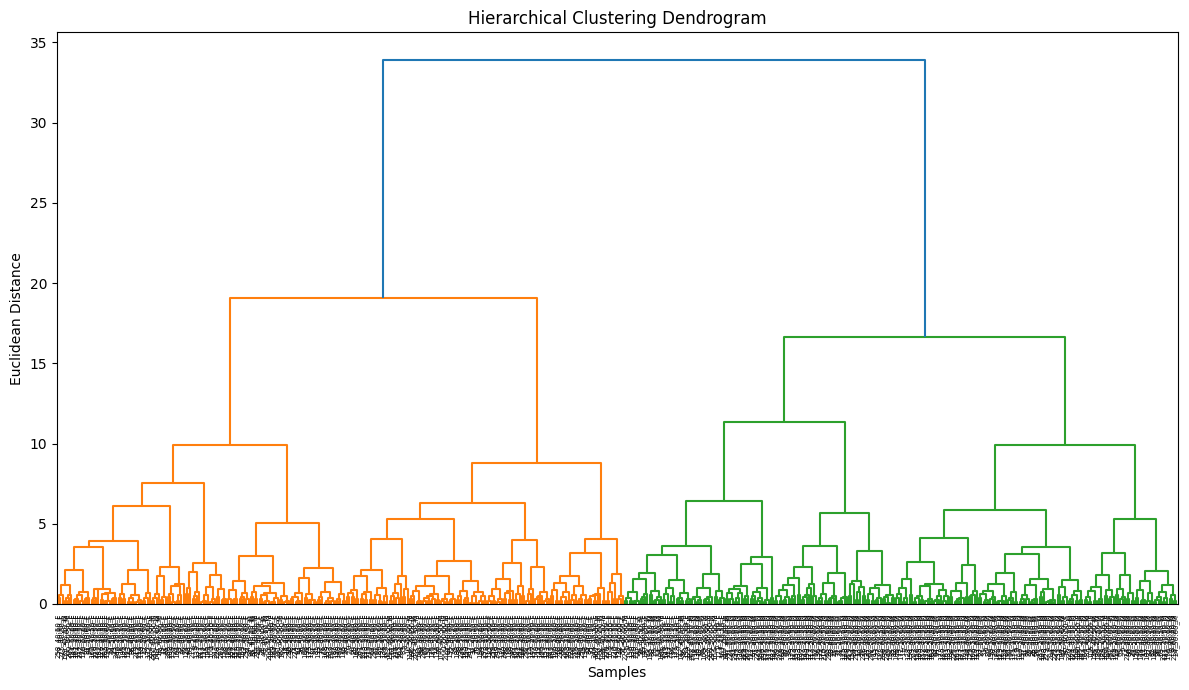

In [29]:
# Select only the protein columns for clustering
protein_columns = ["NEK2", "PRDM13", "TSPAN12"]
df_proteins = df_signal_transduction[protein_columns]

# Standardize the data
ss_scaler = StandardScaler()
df_proteins_scaled = ss_scaler.fit_transform(df_proteins)

# Perform hierarchical clustering
linkage_matrix = linkage(df_proteins_scaled, method='ward')

# Create a dendrogram
plt.figure(figsize=(12, 7))
dendrogram(linkage_matrix, labels=df_signal_transduction['Samples'].values, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [30]:
from scipy.cluster.hierarchy import fcluster

num_clusters = 2  # Adjust this number as needed
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Create a DataFrame to easily view the sample names with their corresponding clusters
df_clusters_d = pd.DataFrame({
    'Sample': df_signal_transduction['Samples'],
    'Cluster': cluster_labels
})

# Group the samples by their cluster
clusters = df_clusters_d.groupby('Cluster')['Sample'].apply(list).to_dict()

# Print each cluster as a list
for cluster_id, samples in clusters.items():
    print(f"Cluster {cluster_id}: {samples}\n")

Cluster 1: ['5_50:60_F', '6_50:60_F', '7_40:50_F', '41_40:50_F', '57_40:50_F', '67_40:50_F', '86_40:50_F', '89_40:50_F', '105_40:50_F', '107_40:50_F', '127_40:50_F', '128_50:60_F', '129_40:50_F', '130_50:60_F', '131_40:50_F', '137_40:50_F', '143_40:50_F', '151_40:50_F', '156_50:60_F', '171_40:50_F', '174_50:60_F', '180_40:50_F', '191_50:60_F', '207_50:60_F', '213_40:50_F', '217_40:50_F', '230_40:50_F', '248_40:50_F', '1_50:60_M', '2_40:50_M', '4_40:50_M', '5_50:60_M', '6_40:50_M', '7_50:60_M', '8_40:50_M', '9_50:60_M', '11_40:50_M', '12_40:50_M', '13_50:60_M', '14_40:50_M', '15_50:60_M', '16_40:50_M', '17_40:50_M', '18_50:60_M', '19_40:50_M', '20_40:50_M', '22_40:50_M', '23_40:50_M', '24_50:60_M', '25_40:50_M', '26_40:50_M', '27_50:60_M', '28_40:50_M', '29_40:50_M', '30_50:60_M', '31_40:50_M', '32_40:50_M', '33_50:60_M', '34_40:50_M', '35_50:60_M', '36_40:50_M', '37_40:50_M', '38_50:60_M', '39_40:50_M', '40_40:50_M', '41_50:60_M', '42_40:50_M', '43_50:60_M', '44_40:50_M', '45_40:50_M',

In [31]:
cluster_counts = df_clusters_d['Cluster'].value_counts()
cluster_counts

,count
Cluster,
2,253
1,247


Performed clustering to identify natural groupings or patterns in our data. We used K-means algorithm and Elbow method to determine the optimal number of clusters by plotting the Within-Cluster Sum of Square (WCSS) against different numbers of clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

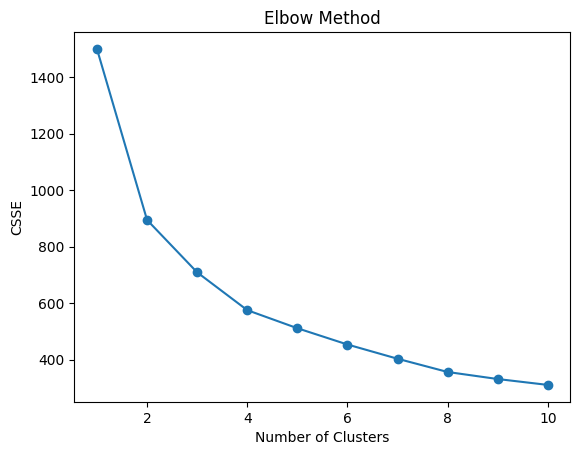

In [32]:
pro_columns = df_signal_transduction.columns[3:]

# Data Standardization/Normalization
s_scaler = StandardScaler()
# m_scaler = MinMaxScaler()
X = s_scaler.fit_transform(df_signal_transduction[pro_columns])

k_rang = range(1, 11)
csse = []

for k in k_rang:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    csse.append(kmeans.inertia_)    # sum of square error

# Plotting the Elbow Curve
plt.plot(k_rang, csse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('CSSE')
plt.show()

In [33]:
csse

[1500.000000000001,
 894.5110147933111,
 709.077404491859,
 575.1850002797481,
 511.211384405899,
 453.56971202047583,
 403.1533183799265,
 356.25705101313724,
 331.35001941674545,
 310.5138060267088]

In [34]:
# K-means Clustering (optimal k based on the Elbow plot)
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(X)
print(clusters)

# Add cluster labels to the DataFrame
df_cluster = df_signal_transduction.copy()
df_cluster['Cluster'] = clusters

# print the DataFrame
df_cluster

[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Samples,Gender,Age_Group,NEK2,PRDM13,TSPAN12,Cluster
0,1_50:60_F,Female,50-60,189.2,288.6,163.2,1
1,2_50:60_F,Female,50-60,199.0,289.0,145.0,1
2,3_40:50_F,Female,40-50,182.0,288.6,174.0,1
3,4_40:50_F,Female,40-50,179.0,301.0,153.4,1
4,5_50:60_F,Female,50-60,199.0,300.0,172.0,0
...,...,...,...,...,...,...,...
495,235_50:60_M,Male,50-60,211.0,280.0,165.0,0
496,236_40:50_M,Male,40-50,208.0,293.0,171.4,0
497,237_50:60_M,Male,50-60,190.0,305.0,190.0,0
498,238_40:50_M,Male,40-50,208.2,298.0,172.0,0


In [35]:
# Group the DataFrame by the 'Cluster' column
clustered_samples = df_cluster.groupby('Cluster')['Samples'].apply(list)

# Print the sample names for each cluster
for cluster, samples in clustered_samples.items():
    print(f"Cluster {cluster}:")
    print(samples)
    print("\n")


Cluster 0:
['5_50:60_F', '35_40:50_F', '48_50:60_F', '67_40:50_F', '89_40:50_F', '92_40:50_F', '105_40:50_F', '131_40:50_F', '136_50:60_F', '137_40:50_F', '174_50:60_F', '180_40:50_F', '244_40:50_F', '1_50:60_M', '2_40:50_M', '4_40:50_M', '5_50:60_M', '6_40:50_M', '7_50:60_M', '8_40:50_M', '9_50:60_M', '10_40:50_M', '11_40:50_M', '12_40:50_M', '13_50:60_M', '14_40:50_M', '15_50:60_M', '16_40:50_M', '17_40:50_M', '18_50:60_M', '19_40:50_M', '20_40:50_M', '22_40:50_M', '23_40:50_M', '24_50:60_M', '25_40:50_M', '26_40:50_M', '27_50:60_M', '28_40:50_M', '29_40:50_M', '30_50:60_M', '31_40:50_M', '32_40:50_M', '33_50:60_M', '34_40:50_M', '35_50:60_M', '36_40:50_M', '37_40:50_M', '38_50:60_M', '39_40:50_M', '40_40:50_M', '41_50:60_M', '42_40:50_M', '43_50:60_M', '44_40:50_M', '45_40:50_M', '46_50:60_M', '47_50:60_M', '49_50:60_M', '50_40:50_M', '51_40:50_M', '52_50:60_M', '53_40:50_M', '54_40:50_M', '55_50:60_M', '56_40:50_M', '57_40:50_M', '58_50:60_M', '59_40:50_M', '60_40:50_M', '61_50:60_

In [36]:
# kmeans.cluster_centers_

df_cluster.value_counts('Cluster')

,count
Cluster,
1,267
0,233


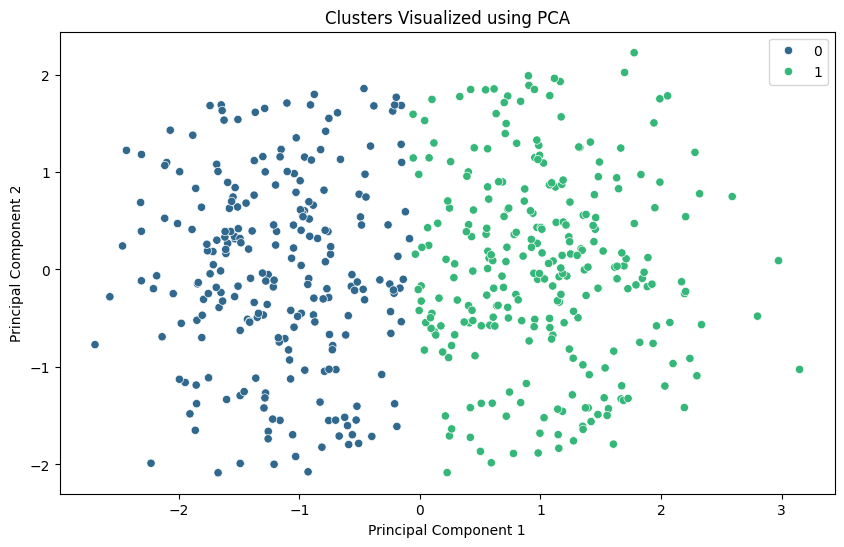

In [37]:
# Visualize the Clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
plt.title('Clusters Visualized using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

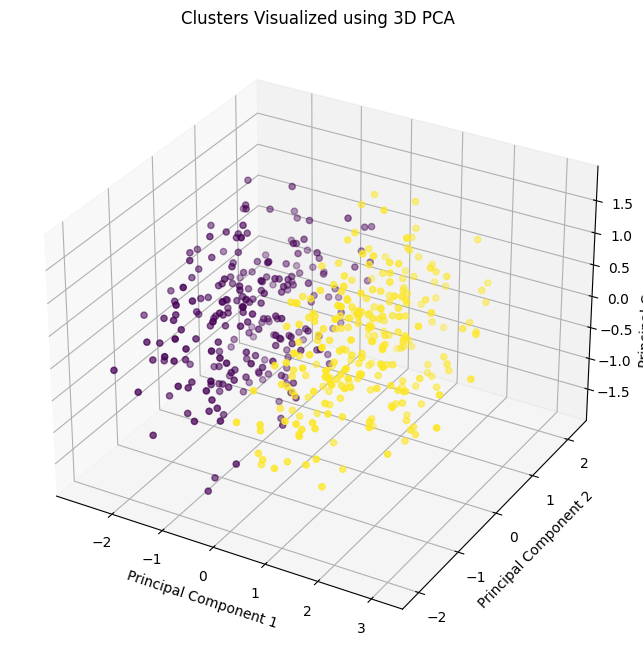

In [38]:
from mpl_toolkits.mplot3d import Axes3D

# Perform PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='viridis')
ax.set_title('Clusters Visualized using 3D PCA')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()
